Red Light Violation Data

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests

In [30]:
# Get csv files
# Chicago data
chicago_daycount_path = "../Chicago/Chicago_DayCountAll.csv"
chicago_hourcount_path  = "../Chicago/Chicago_HourCount.csv"
chicago_moutncount_path = "../Chicago/Chicago_MonthCount.csv"

chicago_daycount_df = pd.read_csv(chicago_daycount_path)
chicago_hourcount_df = pd.read_csv(chicago_hourcount_path)
chicago_moutncount_df = pd.read_csv(chicago_moutncount_path)

In [3]:
# chicago_moutncount_df
# chicago_hourcount_df.head()
# chicago_daycount_df.head()

In [31]:
# New York data
new_york_daycount_path = "../NY Red Light Violation/New_York_DayCount.csv"
new_york_hourcount_path = "../NY Red Light Violation/New_York_HourCount.csv"
new_york_monthcount_path = "../NY Red Light Violation/New_York_MonthCount.csv"

new_york_daycount_df = pd.read_csv(new_york_daycount_path)
new_york_hourcount_df = pd.read_csv(new_york_hourcount_path)
new_york_monthcount_df = pd.read_csv(new_york_monthcount_path)
new_york_daycount_df = new_york_daycount_df.rename(columns={'State':'Daily Count'})
# new_york_hourcount_df.head()

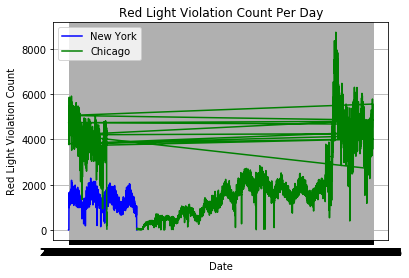

In [39]:
# plot data
# 1. Violation Per Day
x_daily1 = new_york_daycount_df['Issue Date']
y_daily1 = new_york_daycount_df['Daily Count']
x_daily2 = chicago_daycount_df['date']
y_daily2 = chicago_daycount_df['Daily Total']

new_york_dailycount, = plt.plot(x_daily1, y_daily1, label='New York', color="blue")
chicago_dailycount, = plt.plot(x_daily2, y_daily2, label='Chicago', color="green")

# set labels and sticks
plt.title("Red Light Violation Count Per Day")
plt.xlabel("Date")
plt.ylabel("Red Light Violation Count")

# plt.style.use('seaborn-bright')
plt.legend()
plt.grid()
plt.savefig("DailyCount.png")
# Show plot
plt.show()

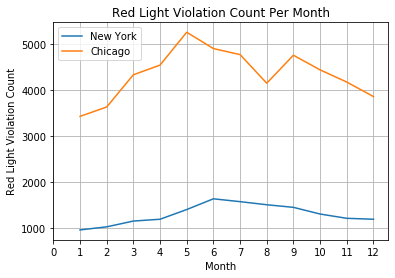

In [34]:
# plot data
# 2. Violation Per Hour
x_month = new_york_monthcount_df['Month']
y_month1 = new_york_monthcount_df['Average Count']
y_month2 = chicago_moutncount_df['Daily Avg']
plt.plot(x_month, y_month1, label='New York')
plt.plot(x_month, y_month2, label='Chicago')

# set labels and sticks
plt.title("Red Light Violation Count Per Month")
plt.xlabel("Month")
plt.ylabel("Red Light Violation Count")
plt.xticks(np.arange(0,13))

# plt.style.use('seaborn-bright')
plt.legend()
plt.grid()
plt.savefig("MonthlyCount.png")
# Show plot
plt.show()

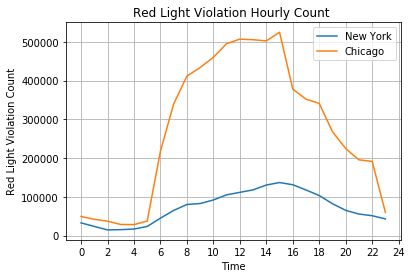

In [25]:
# plot data
# 3. Violation Per Hour
x_hour = new_york_hourcount_df['Hour']
y_hour1 = new_york_hourcount_df['Total']
y_hout2 = chicago_hourcount_df['Total']
plt.plot(x_axis, y_hour1, label='New York')
plt.plot(x_axis, y_hout2, label='Chicago')

# set labels and sticks
plt.title("Red Light Violation Hourly Count ")
plt.xlabel("Time")
plt.ylabel("Red Light Violation Count")
plt.xticks(np.arange(0,26,2))

# plt.style.use('seaborn-bright')
plt.legend()
plt.grid()
plt.savefig("HourCount.png")
# Show plot
plt.show()

Section 2 : Violation Count vs Tempurature

In [90]:
# Read the temp csv file
temp_path = "../NOAAdata/daily_weather.csv"
daily_weather_df = pd.read_csv(temp_path)
daily_weather_df.head()

,station,date,PRCP,SNOW,TAVG,TMAX,TMIN,city
0,GHCND:USW00012916,2010-01-01,0.0,NaN,NaN,54.0,42.0,New Orleans
1,GHCND:USW00012916,2010-01-02,0.0,NaN,NaN,51.0,39.0,New Orleans
2,GHCND:USW00012916,2010-01-03,0.0,NaN,NaN,47.0,37.0,New Orleans
3,GHCND:USW00012916,2010-01-04,0.0,NaN,NaN,43.0,30.0,New Orleans
4,GHCND:USW00012916,2010-01-05,0.0,NaN,NaN,43.0,28.0,New Orleans


In [ ]:
# Select the weather data for New York
new_york_daily_weather = daily_weather_df.loc[(daily_weather_df['city'] == 'New York'), :]
new_york_daily_weather.head()

# Select the weather data for Chicago
chicago_daily_weather = daily_weather_df.loc[(daily_weather_df['city'] == 'Chicago'), :]
chicago_daily_weather.head()

In [ ]:
# combine dataframes
new_york_daycount_df = new_york_daycount_df.rename(columns={'Issue Date':'date'})
combined_data_NY = pd.merge(new_york_daycount_df, new_york_daily_weather, on="date", how="outer")
combined_data_NY.head()

combined_data_CHI = pd.merge(chicago_daycount_df, chicago_daily_weather, on="date", how="outer")
combined_data_CHI.head()

In [ ]:
# clean up the dataframe
NY_Daily_Weather = combined_data_NY.dropna(axis = 0, how='any')
NY_Daily_Weather = NY_Daily_Weather.drop(['station'], axis=1)
NY_Daily_Weather.head()

CHI_Daily_Weather = combined_data_CHI.dropna(axis = 0, how='any')
CHI_Daily_Weather = CHI_Daily_Weather.drop(['station'], axis=1)
CHI_Daily_Weather.head()

In [ ]:
CHI_Daily_Weather_1 = CHI_Daily_Weather.groupby('TAVG')['Daily Total'].sum()
CHI_Daily_Weather_df = pd.DataFrame(CHI_Daily_Weather_1)

CHI_Daily_Weather_2 = CHI_Daily_Weather.groupby('TAVG')['Daily Total'].mean()
CHI_Daily_Weather_2

NY_Daily_Weather_1 = NY_Daily_Weather.groupby('TAVG')['Daily Count'].sum()
NY_Daily_Weather_df = pd.DataFrame(NY_Daily_Weather_1)

NY_Daily_Weather_2 = NY_Daily_Weather.groupby('TAVG')['Daily Count'].mean()
NY_Daily_Weather_2

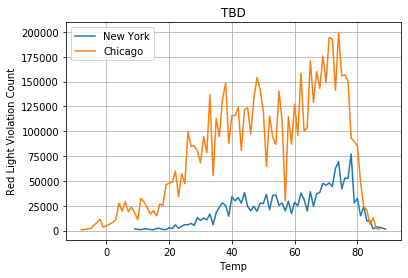

In [114]:
# plot data
x_NY_temp = NY_Daily_Weather_df.index
x_CHI_temp = CHI_Daily_Weather_df.index
y_NY_count = NY_Daily_Weather_df['Daily Count']
y_CHI_count = CHI_Daily_Weather_df['Daily Total']

plt.plot(x_NY_temp, y_NY_count, label='New York')
plt.plot(x_CHI_temp, y_CHI_count, label='Chicago')

# set labels and sticks
plt.title("TBD")
plt.xlabel("Temp")
plt.ylabel("Red Light Violation Count")
# plt.xticks(np.arange(0,26,2))

# plt.style.use('seaborn-bright')
plt.legend()
plt.grid()
plt.savefig("Temp vs Violation Count.png")
# Show plot
plt.show()

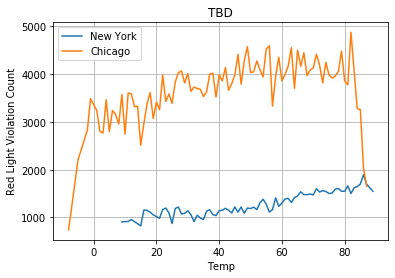

In [115]:
# plot data
x_NY_temp = NY_Daily_Weather_df.index
x_CHI_temp = CHI_Daily_Weather_df.index
y_NY_count = pd.DataFrame(NY_Daily_Weather_2)['Daily Count']
y_CHI_count = pd.DataFrame(CHI_Daily_Weather_2)['Daily Total']
plt.plot(x_NY_temp, y_NY_count, label='New York')
plt.plot(x_CHI_temp, y_CHI_count, label='Chicago')

# set labels and sticks
plt.title("TBD")
plt.xlabel("Temp")
plt.ylabel("Red Light Violation Count")
# plt.xticks(np.arange(0,26,2))

# plt.style.use('seaborn-bright')
plt.legend()
plt.grid()
plt.savefig("Temp vs Ave Violation Count.png")
# Show plot
plt.show()